DISCLAIMER: 
 The Content of this Article is got from a public website 
 and no intention to profit from Or commecialise this 
 and no addition has been made to the article, and is as is 
 Images have been obtained on Wikipedia and used for learning purposes only


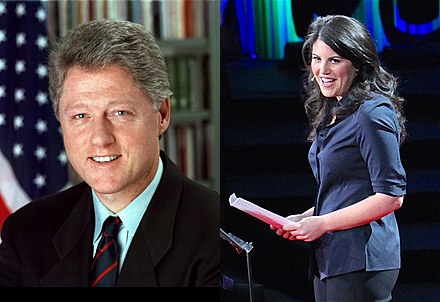

In [22]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from PIL import Image

class Monica:

    def __init__(self, url):
        self.url = url
        self.response = requests.get(url)
        self.webpage = BeautifulSoup(self.response.text, "lxml")
        self.main_page_title = self.webpage.find_all("article", class_="article main-content")[0]
        self.Disclaimer = print("DISCLAIMER: \n The Content of this Article is got from a public website \n and no intention to profit from Or commecialise this \n and no addition has been made to the article, and is as is \n Images have been obtained on Wikipedia and used for learning purposes only")
    
    
    def main_title(self):
        self.main_header_h1 = self.main_page_title.find_all("h1")
        return [item.get_text() for item in self.main_header_h1]
    
    
    def article_content(self):
        self.whole_title = self.webpage.find_all("div", class_="grid--item body body__container article__body grid-layout__content")[0]
        self.whole_article = self.main_page_title.find_all("p")
        return [item.get_text() for item in self.whole_article]

    # Use Jupiter Note current directory to save images - run pwd in a cell
    @staticmethod
    def save_and_retrieve_monica_image(mon_image_url):
        monica_image_response = requests.get(mon_image_url)
        monica_image_soup = BeautifulSoup(monica_image_response.content, "lxml")

        path = open(r'C:\Users\Olu\PythonTraining\WebScrapping_Practice\monica.jpg', 'wb')
        path.write(monica_image_response.content)
        path.close()
                
        monica_img = Image.open(r'C:\Users\Olu\PythonTraining\WebScrapping_Practice\monica.jpg')
        return monica_img
#         print("Images have been obtained on Wikipedia and used for learning purposes only")

     # Use Jupiter Note current directory to save images - run pwd in a cell
    @staticmethod
    def save_and_retrieve_bill_image(bill_image_url):
        bill_image_response = requests.get(bill_image_url)
        bill_image_soup = BeautifulSoup(bill_image_response.content, "lxml")

        path = open(r'C:\Users\Olu\PythonTraining\WebScrapping_Practice\bill.jpg', 'wb')
        path.write(bill_image_response.content)
        path.close()
                
        bill_img = Image.open(r'C:\Users\Olu\PythonTraining\WebScrapping_Practice\bill.jpg')
        return bill_img
    
    
# #Combined images
     # Use Jupiter Note current directory to save images - run pwd in a cell
    @staticmethod
    def retrieve_bill_and_monica_images():
            
        images = [Image.open(x) for x in ['bill.jpg', 'monica.jpg']]
        widths, heights = zip(*(i.size for i in images))

        total_width = sum(widths)
        max_height = max(heights)

        new_im = Image.new('RGB', (total_width, max_height))

        x_offset = 0
        for im in images:
            
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
            
        new_im.save('Bill_and_Monica.jpg')
        return new_im

url = "https://www.vanityfair.com/style/society/2014/06/monica-lewinsky-humiliation-culture"
mon_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Monica_Lewinsky.jpg/220px-Monica_Lewinsky.jpg"
bill_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Bill_Clinton.jpg/220px-Bill_Clinton.jpg"


# List of Methods Calls


# Monica(url).main_title()
# Monica(url).article_content()
# Monica(url).save_and_retrieve_monica_image(mon_image_url)
# Monica(url).save_and_retrieve_bill_image(bill_image_url)
Monica(url).retrieve_bill_and_monica_images() 
